Bryan Kim bjk3yf

In [29]:
import sklearn
import pandas as pd
import numpy as np 
import os
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [30]:
HOUSING_PATH = os.path.join("datasets", "housing")
if not os.path.isdir(HOUSING_PATH):
      os.makedirs(HOUSING_PATH)

def load_housing_data(housing_path=HOUSING_PATH):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    headers = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PRATIO','B','LSTAT','MEDV']
    return pd.read_csv(csv_path, delim_whitespace = True, names = headers)

df = load_housing_data()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    float64
 10  PRATIO  506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [32]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


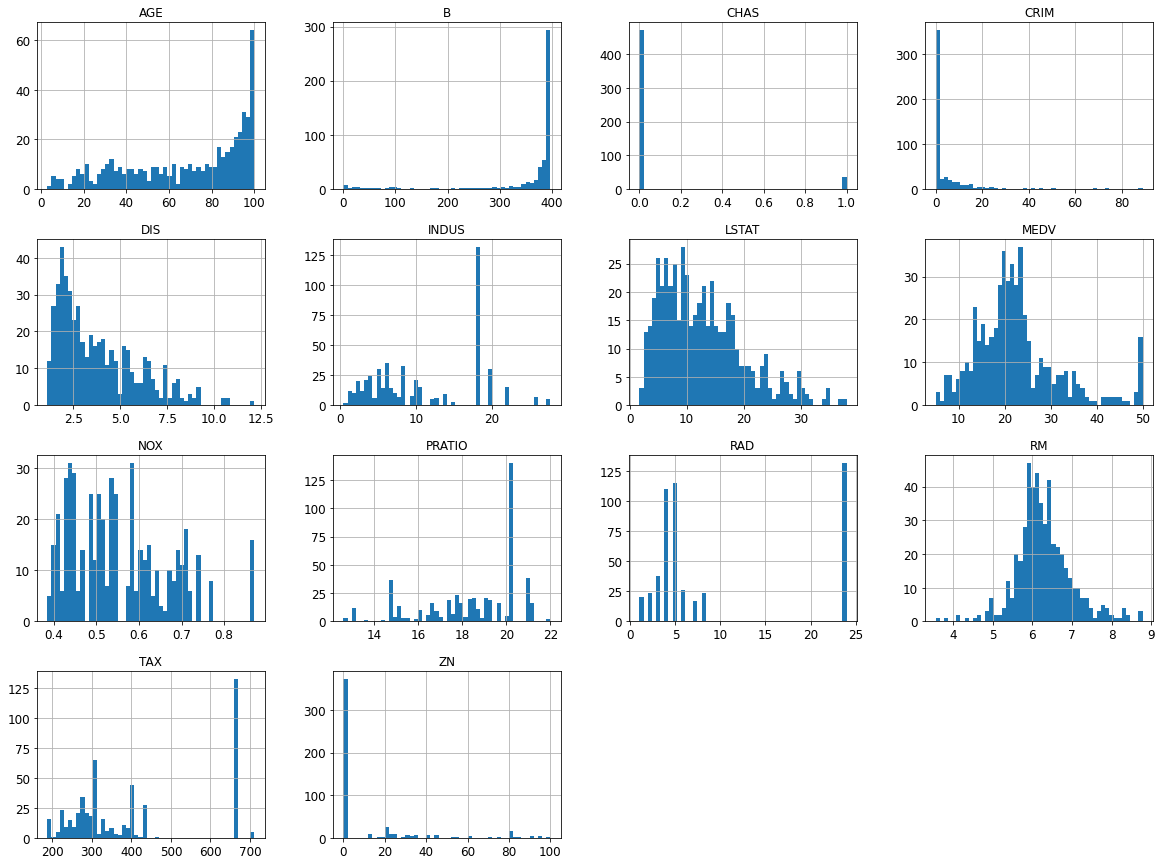

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


Based on the data above, overall the data seems to be clean and usable for the model. Some portions do have longer tails that could be handled with, but overall there doesn't need to be much manipulation. 

Getting Correlation

In [34]:
corr_matrix = df.corr()
corr_matrix.shape

(14, 14)

In [35]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV      1.000000
RM        0.695360
ZN        0.360445
B         0.333461
DIS       0.249929
CHAS      0.175260
AGE      -0.376955
RAD      -0.381626
CRIM     -0.388305
NOX      -0.427321
TAX      -0.468536
INDUS    -0.483725
PRATIO   -0.507787
LSTAT    -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5dfe9b7b8>,
      dtype=object)

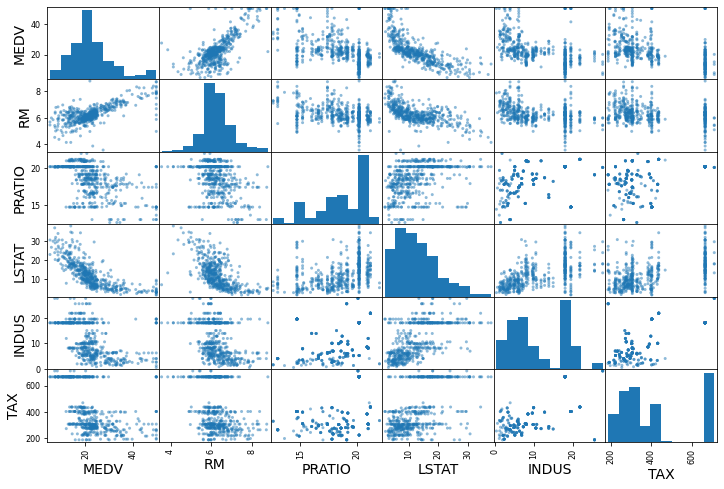

In [36]:
from pandas.plotting import scatter_matrix

attributes = ['MEDV',"RM","PRATIO","LSTAT","INDUS", "TAX"]
scatter_matrix(df[attributes], figsize=(12, 8))

Preparing data for Algorithms

Checking for any incomplete rows

In [37]:
data_incomplete = df[df.isnull().any(axis=1)].head()
data_incomplete

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV


No incompletes

**Shuffling** dataframe

In [38]:
df = df.sample(frac=1)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())])


labels = df['MEDV'].copy()
df=df.drop('MEDV', axis = 1)
housePipe = num_pipeline.fit_transform(df)

In [40]:
nlabels = labels.to_numpy()

splitting to training and testing data

In [41]:
an = int(len(housePipe)*.8)
trainx = housePipe[0:an]
trainy = nlabels[0:an]
testx = housePipe[an:len(housePipe)]
testy = nlabels[an:len(nlabels)]

Linear regression


In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(trainx, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
from sklearn.metrics import mean_squared_error

housePredict = lin_reg.predict(testx)
lin_mse = mean_squared_error(testy, housePredict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.718719220385642

Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(trainx,trainy)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [45]:
housePredict2 = tree_reg.predict(testx)
tree_mse = mean_squared_error(testy, housePredict2)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.2586589990968085

Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=21)
forest_reg.fit(trainx, trainy)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [47]:
housing_predictions = forest_reg.predict(testx)
forest_mse = mean_squared_error(testy, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.8731813156410815

Tree CrossValidation

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, trainx, trainy,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [49]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2.8770913  4.70452894 5.86641414 4.8767273  4.79739513]
Mean: 4.6244313600392255
Standard deviation: 0.9690927556871256


Linear CrossValidation

In [50]:
lin_scores = cross_val_score(lin_reg, trainx, trainy,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.82791361 5.25296917 5.87227323 4.25782713 4.87025025]
Mean: 4.8162466781703275
Standard deviation: 0.720759272619974


Random Forest CrossValidation

In [51]:
forest_scores = cross_val_score(forest_reg, trainx, trainy,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.72680597 4.49856264 4.65173662 3.31209586 3.28652097]
Mean: 3.6951444104216216
Standard deviation: 0.7499237499636047


Results of CrossValidation

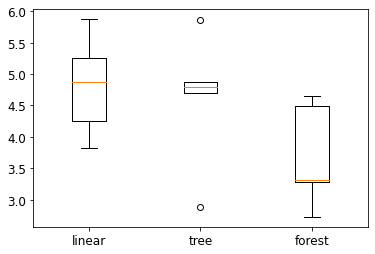

In [52]:
n = [lin_rmse_scores,tree_rmse_scores,forest_rmse_scores]
lab = ['linear', 'tree', 'forest']
plt.boxplot(n,labels = lab)
plt.show()

RMSE RESULTS: 
Random Forest Preforms the best out of the three, though due to the random nature of the algorithm, there is higher range of error compared to tree. 

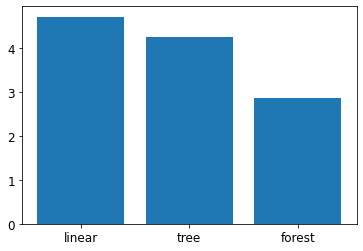

In [53]:
rm = [lin_rmse,tree_rmse,forest_rmse]
plt.bar(lab,rm)
plt.show()

Tuning Random Forest Model

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(trainx, trainy)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [55]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.935315146645432 {'max_features': 2, 'n_estimators': 3}
4.188573926782653 {'max_features': 2, 'n_estimators': 10}
4.027089360325815 {'max_features': 2, 'n_estimators': 30}
5.172786406221465 {'max_features': 4, 'n_estimators': 3}
4.205576584785233 {'max_features': 4, 'n_estimators': 10}
3.811295889142608 {'max_features': 4, 'n_estimators': 30}
4.602713325729481 {'max_features': 6, 'n_estimators': 3}
3.9040709087430554 {'max_features': 6, 'n_estimators': 10}
3.7050213228922746 {'max_features': 6, 'n_estimators': 30}
4.49201566094963 {'max_features': 8, 'n_estimators': 3}
3.9185575266296873 {'max_features': 8, 'n_estimators': 10}
3.780060349049393 {'max_features': 8, 'n_estimators': 30}
4.20010883571181 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.8594072819412615 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.391397294586611 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.741131402363874 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [56]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(testx)
final_mse = mean_squared_error(testy, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.273004256450807

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(trainx, trainy)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [58]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.571058855448869 {'max_features': 7, 'n_estimators': 180}
3.659126827150736 {'max_features': 5, 'n_estimators': 15}
3.6614838826199163 {'max_features': 3, 'n_estimators': 72}
3.6209928961217104 {'max_features': 5, 'n_estimators': 21}
3.5761860044320937 {'max_features': 7, 'n_estimators': 122}
3.678646186657775 {'max_features': 3, 'n_estimators': 75}
3.662894995705877 {'max_features': 3, 'n_estimators': 88}
3.5016838331237863 {'max_features': 5, 'n_estimators': 100}
3.6866515985104575 {'max_features': 3, 'n_estimators': 150}
4.6571163022933435 {'max_features': 5, 'n_estimators': 2}


Best Model Results on test data

In [59]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(testx)
final_mse = mean_squared_error(testy, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.17319667793579

As we can see, we were able to reduce the best model for this case, the random forest, and tune the hyperparameters to the point where the RMSE is reduced to 3.173 when it ran on the test data. What had not worked as well as I expected was that the gridsearch. It did not optimize the models as efficiently as the randomized search but overall it isn't a huge issue. For this problem, there was not much limitation to the system as the data size was not large in any significant way. 